## Transfer Learning Inception V3 using Keras

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
train_path = '/gdrive/My Drive/Colab Notebooks/Dataset/train'
valid_path = '/gdrive/My Drive/Colab Notebooks/Dataset/test'


Mounted at /gdrive


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/gdrive/My Drive/Colab Notebooks/Dataset/train')
print(folders)

['/gdrive/My Drive/Colab Notebooks/Dataset/train']


In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
training_set = train_datagen.flow_from_directory('/gdrive/My Drive/Colab Notebooks/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Mounted at /gdrive
Found 9281 images belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
test_set = test_datagen.flow_from_directory('/gdrive/My Drive/Colab Notebooks/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Mounted at /gdrive
Found 2319 images belonging to 5 classes.


In [ ]:
#from sklearn.linear_model import Ridge #regularization technique
#model = Ridge(alpha=1.0)
#model.fit(training_set, test_set)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
581/581 [==============================] - 1310s 2s/step - loss: 2.6801 - accuracy: 0.7080 - val_loss: 1.5801 - val_accuracy: 0.8547
Epoch 2/10
581/581 [==============================] - 1298s 2s/step - loss: 1.6590 - accuracy: 0.8602 - val_loss: 0.9970 - val_accuracy: 0.9077
Epoch 3/10
581/581 [==============================] - 1296s 2s/step - loss: 1.4937 - accuracy: 0.8850 - val_loss: 3.5609 - val_accuracy: 0.8409
Epoch 4/10
581/581 [==============================] - 1298s 2s/step - loss: 1.3981 - accuracy: 0.9105 - val_loss: 1.5248 - val_accuracy: 0.8974
Epoch 5/10
581/581 [==============================] - 1299s 2s/step - loss: 1.2236 - accuracy: 0.9171 - val_loss: 2.2535 - val_accuracy: 0.8685
Epoch 6/10
581/581 [==============================] - 1292s 2s/step - loss: 1.4104 - accuracy: 0.9095 - val_loss: 1.2062 - val_accuracy: 0.9129
Epoch 7/10
581/581 [==============================] - 1292s 2s/step - loss: 1.1400 - accuracy: 0.9303 - val_loss: 2.5110 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

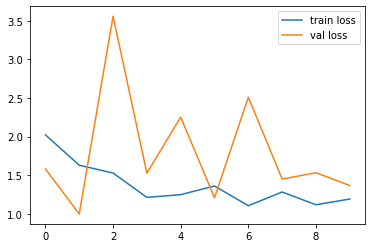

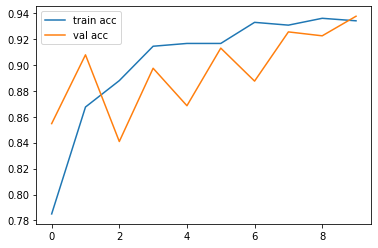

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_inception.h5')